In [4]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()
import matplotlib.pyplot as plt

In [5]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('^NSEI', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-30 00:00:00+05:30,17468.150391,17522.500000,17387.199219,17498.250000,17498.250000,505000
1,2022-03-31 00:00:00+05:30,17519.199219,17559.800781,17435.199219,17464.750000,17464.750000,281100
2,2022-04-01 00:00:00+05:30,17436.900391,17703.699219,17422.699219,17670.449219,17670.449219,291800
3,2022-04-04 00:00:00+05:30,17809.099609,18114.650391,17791.400391,18053.400391,18053.400391,345500
4,2022-04-05 00:00:00+05:30,18080.599609,18095.449219,17921.550781,17957.400391,17957.400391,283500
...,...,...,...,...,...,...,...
245,2023-03-23 00:00:00+05:30,17097.400391,17205.400391,17045.300781,17076.900391,17076.900391,219200
246,2023-03-24 00:00:00+05:30,17076.199219,17109.449219,16917.349609,16945.050781,16945.050781,228000
247,2023-03-27 00:00:00+05:30,16984.300781,17091.000000,16918.550781,16985.699219,16985.699219,218400
248,2023-03-28 00:00:00+05:30,17031.750000,17061.750000,16913.750000,16951.699219,16951.699219,238800


<Figure size 432x288 with 0 Axes>

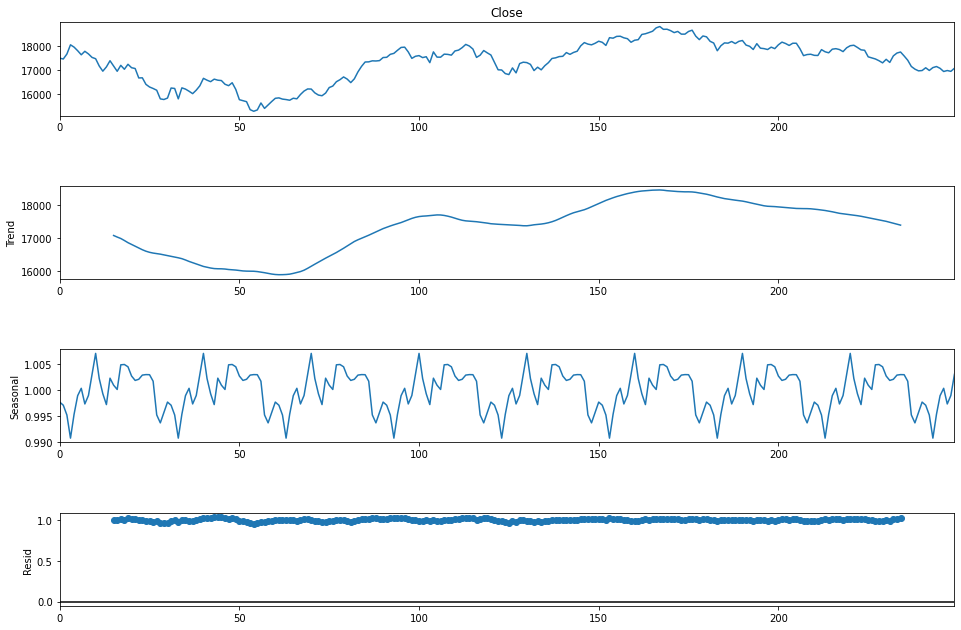

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

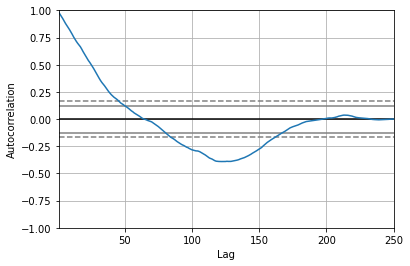

In [7]:
pd.plotting.autocorrelation_plot(data["Close"])

C:\Users\Acer Assfire 7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


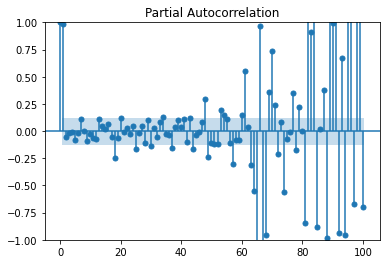

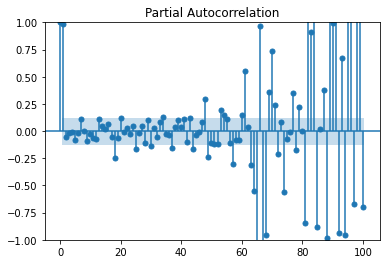

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [9]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(data["Close"],          
                      seasonal=True,   
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3236.381, Time=1.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3228.941, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3230.736, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3230.749, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3226.970, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3232.592, Time=0.59 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.043 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  250
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1612.485
Date:                Thu, 30 Mar 2023   AIC                           3226.970
Time:                        21:08:22   BIC                           3230.487
Sample:                             0   HQIC                          3228.386
                                - 250                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.468e+04   2053.578     12.019      0.000    2.07e+04    2.87e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                 1.08
Prob(Q):                              0.62   Prob(JB):                         0.58
Heteroskedasticity (H):               0.46   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
arima_order = stepwise_fit.get_params().get("order")
arima_order

(0, 1, 0)

In [11]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Close"], order=(arima_order))
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1612.485
Date:                Thu, 30 Mar 2023   AIC                           3226.970
Time:                        21:08:23   BIC                           3230.487
Sample:                             0   HQIC                          3228.386
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.468e+04   2053.578     12.019      0.000    2.07e+04    2.87e+04
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                 1.08
Prob(Q):                              0.62   Pr

In [12]:
import statsmodels.api as sm
import warnings
(p, d, q) = arima_order
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  250
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               -1624.400
Date:                            Thu, 30 Mar 2023   AIC                           3250.801
Time:                                    21:08:23   BIC                           3254.269
Sample:                                         0   HQIC                          3252.199
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.257e+04   3918.907     13.416      0.000    4.49e+04    6.03e+04
Ljung-Box (L1) (Q):                

In [13]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

250    16969.699219
251    16898.548828
252    16911.998047
253    17026.449219
254    16914.798828
255    17033.898438
256    17078.298828
257    17003.298828
258    16871.449219
259    16912.097656
260    16878.097656
Name: predicted_mean, dtype: float64


<AxesSubplot:>

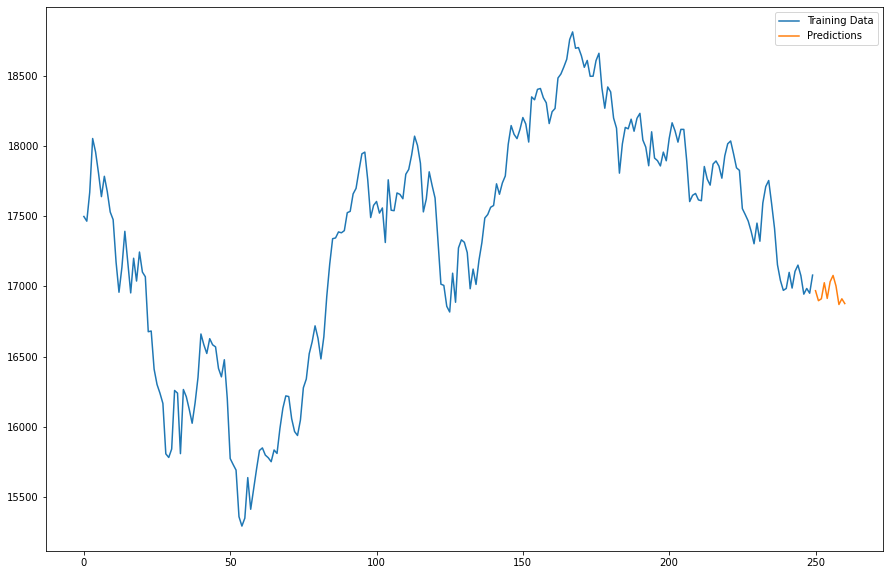

In [14]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")